In [15]:
import pandas as pd
import numpy as np

In [16]:
from selenium import webdriver
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities

In [19]:
from bs4 import BeautifulSoup

In [192]:
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
url = "https://www.google.com/flights/explore/#explore;f=JFK,EWR,LGA;t=r-United+States-0x54eab584e432360b%253A0x1c3bb99243deb742;li=3;lx=12;d=2018-01-14"
driver = webdriver.PhantomJS(executable_path="./phantomjs")
dcap = dict(DesiredCapabilities.PHANTOMJS)
dcap["phantomjs.page.settings.userAgent"] = ('Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 (KHTML, like Gecko)Chrome/63.0.3239.84 Safari/537.36')
driver = webdriver.PhantomJS(executable_path="./phantomjs",desired_capabilities=dcap,service_args=['--ignore-ssl-errors=true'])
driver.implicitly_wait(20)
driver.get(url)


### GOOGLE CHROME UPDATE 
# options = webdriver.ChromeOptions()
# options.add_argument("headless")  # remove this line if you want to see the browser popup
# driver = webdriver.Chrome(chrome_options = options,executable_path="./chromedriver")
# driver.get(url)
# print(driver.page_source)
# driver.implicitly_wait(20)
# # driver.quit()  # don't miss this, or chromedriver.exe will keep running!

/Users/macbookpro/anaconda3/lib/python3.6/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


In [28]:
driver.save_screenshot(r'flight_explorer.png')

True

In [31]:
s = BeautifulSoup(driver.page_source,'lxml')

In [68]:
objlist = []

s.find_all('div')

for i in s.find_all('div'):  # for loop over the find_all function for tags "div"
    for txt in i.find_all('div'): # do a secondary loop over 'div' tags
        totlist = {}  # create a dictionary to hold the text data
        totlist['divs'] = txt.text  # create the Dict Key "divs" to hold all the text scraped method
#         print(totlist)
        objlist.append(totlist) # append a list with the 

pd.DataFrame(objlist)

,divs
0,My AccountSearchMapsYouTubePlayNewsGmailDriveC...
1,My AccountSearchMapsYouTubePlayNewsGmailDriveC...
2,My AccountSearchMapsYouTubePlayNewsGmailDriveC...
3,
4,My AccountSearchMapsYouTubePlayNewsGmailDriveC...
5,
6,My AccountSearchMapsYouTubePlayNewsGmailDriveC...
7,
8,
9,


In [102]:
s.find_all('div',{'class':'CTPFVNB-w-e'})



[<div class="CTPFVNB-w-e" style="top: 60.9330779054917px;">$67</div>,
 <div class="CTPFVNB-w-e" style="top: 75.63595215001617px;">$89</div>,
 <div class="CTPFVNB-w-e" style="top: 61.064114832535886px;">$89</div>,
 <div class="CTPFVNB-w-e" style="top: 41.197938144329896px;">$119</div>,
 <div class="CTPFVNB-w-e" style="top: 32.10352422907489px;">$127</div>,
 <div class="CTPFVNB-w-e" style="top: 33.77183967112025px;">$133</div>,
 <div class="CTPFVNB-w-e" style="top: 30.146788990825684px;">$133</div>,
 <div class="CTPFVNB-w-e" style="top: 40.65884476534296px;">$137</div>,
 <div class="CTPFVNB-w-e" style="top: 62.7142061281337px;">$147</div>,
 <div class="CTPFVNB-w-e" style="top: 52.30801831977578px;">$149</div>,
 <div class="CTPFVNB-w-e" style="top: 52.86052631578948px;">$153</div>,
 <div class="CTPFVNB-w-e" style="top: 14.46477876106195px;">$196</div>,
 <div class="CTPFVNB-w-e" style="top: 9.484416905576623px;">$197</div>,
 <div class="CTPFVNB-w-e" style="top: 36.93742331288344px;">$213</

In [104]:
best_price_tags = s.find_all('div',{'class':'CTPFVNB-w-e'})
best_prices = []

for tag in best_price_tags:
    best_prices.append(int(tag.text.replace('$','').replace(',','')))

best_prices

[67, 89, 89, 119, 127, 133, 133, 137, 147, 149, 153, 196, 197, 213, 221]

In [151]:
best_price = best_prices[0]
best_price

67

In [106]:
best_height_tags = s.find_all('div',{'class':'CTPFVNB-w-f'})
best_heights = []
for t in best_height_tags:
    best_heights.append(float(t.attrs['style'].split('height:')[1].replace('px;',"")))

In [152]:
best_height = best_heights[0]
best_height

45.0669220945083

In [153]:
pph = np.array(best_price)/np.array(best_height)

In [154]:
pph

1.4866779643725523

In [155]:
cities = s.find_all('div',{'class':'CTPFVNB-w-o'})
cities

[<div class="CTPFVNB-w-o CTPFVNB-w-b"><div class="CTPFVNB-w-x CTPFVNB-w-f CTPFVNB-w-M" style="left: 0px; height: 45.0669220945083px;"></div><div class="CTPFVNB-w-x" style="left: 6px; height: 73.78033205619413px;"></div><div class="CTPFVNB-w-x" style="left: 12px; height: 51.8154533844189px;"></div><div class="CTPFVNB-w-x" style="left: 18px; height: 45.0669220945083px;"></div><div class="CTPFVNB-w-x" style="left: 24px; height: 45.0669220945083px;"></div><div class="CTPFVNB-w-x" style="left: 30px; height: 45.0669220945083px;"></div><div class="CTPFVNB-w-x CTPFVNB-w-M" style="left: 36px; height: 45.0669220945083px;"></div><div class="CTPFVNB-w-x CTPFVNB-w-M" style="left: 42px; height: 59.95836526181354px;"></div><div class="CTPFVNB-w-x" style="left: 48px; height: 45.0669220945083px;"></div><div class="CTPFVNB-w-x" style="left: 54px; height: 45.0669220945083px;"></div><div class="CTPFVNB-w-x" style="left: 60px; height: 45.0669220945083px;"></div><div class="CTPFVNB-w-x" style="left: 66px; h

In [161]:
hlist = []
for bar in cities[0].find_all('div',{'class':'CTPFVNB-w-x'}):
    hlist.append(float(bar['style'].split("height: ")[1].replace('px;',''))*pph)

In [162]:
hlist

[67.0,
 109.68759387203364,
 77.032892760588766,
 67.0,
 67.0,
 67.0,
 67.0,
 89.138780414538914,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 86.119855812556338,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 81.088314809252026,
 74.466806848903587,
 79.498347852207871,
 74.466806848903587,
 106.66866927005107,
 141.18504055271853,
 157.58786422349056,
 124.07780114148393,
 131.40372484229499,
 79.095824571943524,
 79.095824571943524,
 79.095824571943524,
 104.65605286872935,
 79.095824571943524,
 115.32291979573444,
 89.15890657855212,
 79.095824571943524,
 79.095824571943524,
 89.15890657855212,
 104.65605286872935,
 79.095824571943524,
 116.3292279963953,
 109.68759387203364,
 89.15890657855212,
 79.095824571943524,
 109.68759387203364,
 112.70651847401624,
 105.66236106939022,
 126.79483328326826,
 127.39861820366477,
 89.15890657855212,
 79.095824571943524]

In [163]:
fares = pd.DataFrame(hlist,columns=['price'])

In [178]:
fares.head()

,price
0,67.000000
1,109.687594
2,77.032893
3,67.000000
4,67.000000


In [177]:
fares.describe()

,price
count,60.000000
mean,85.697039
std,22.660332
min,67.000000
25%,67.000000
50%,79.095825
75%,104.656053
max,157.587864


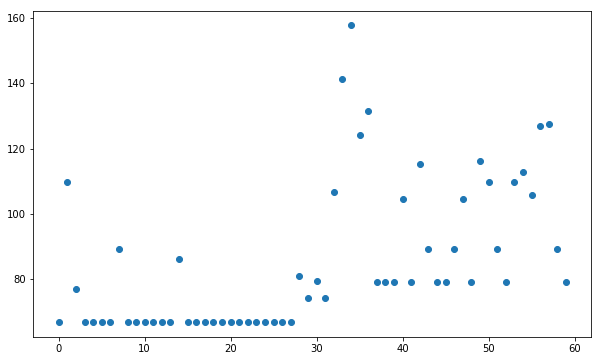

In [194]:
fig, ax = plt.subplots(figsize = (10,6))
plt.scatter(np.arange(len(fares['price'])),fares.price)


In [197]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [195]:
px = [x for x in fares['price']]
ff = pd.DataFrame(px, columns = ['fares']).reset_index()

In [196]:
ff

,index,fares
0,0,67.000000
1,1,109.687594
2,2,77.032893
3,3,67.000000
4,4,67.000000
5,5,67.000000
6,6,67.000000
7,7,89.138780
8,8,67.000000
9,9,67.000000


In [235]:
X = StandardScaler().fit_transform(ff)
db = DBSCAN(eps=.7, min_samples=1).fit(X)

labels = db.labels_
clusters = len(set(labels))
unique_labels = set(labels)
colors = plt.cm.spectral(np.linspace(0, 1, len(unique_labels)))

In [236]:
labels

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

/Users/macbookpro/anaconda3/lib/python3.6/site-packages/matplotlib/lines.py:1206: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


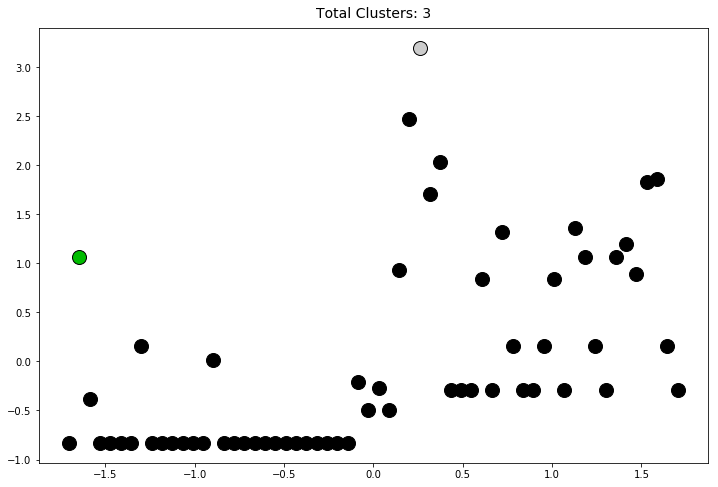

In [237]:
plt.subplots(figsize = (12,8))
for k, c in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.plot(xy[:,0], xy[:,1], 'o',markerfacecolor = c,
            markeredgecolor = 'k', markersize = 14)
    plt.title("Total Clusters: {}".format(clusters), fontsize=14, y = 1.01)

In [242]:
def test_clusters(data_series, eps_val, swap_index, swap_value):
    data_series[swap_index] = swap_value
    ff = pd.DataFrame(data_series, columns = ['fares']).reset_index()
    
    X = StandardScaler().fit_transform(ff)
    db = DBSCAN(eps= eps_val, min_samples=1).fit(X)

    labels = db.labels_
    clusters = len(set(labels))
    unique_labels = set(labels)
    colors = plt.cm.spectral(np.linspace(0, 1, len(unique_labels)))
    
    plt.subplots(figsize = (12,8))
    for k, c in zip(unique_labels, colors):
        class_member_mask = (labels == k)
        xy = X[class_member_mask]
        plt.plot(xy[:,0], xy[:,1], 'o',markerfacecolor = c,
                markeredgecolor = 'k', markersize = 14)
        plt.title("Total Clusters: {}".format(clusters), fontsize=14, y = 1.01)

    

/Users/macbookpro/anaconda3/lib/python3.6/site-packages/matplotlib/lines.py:1206: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


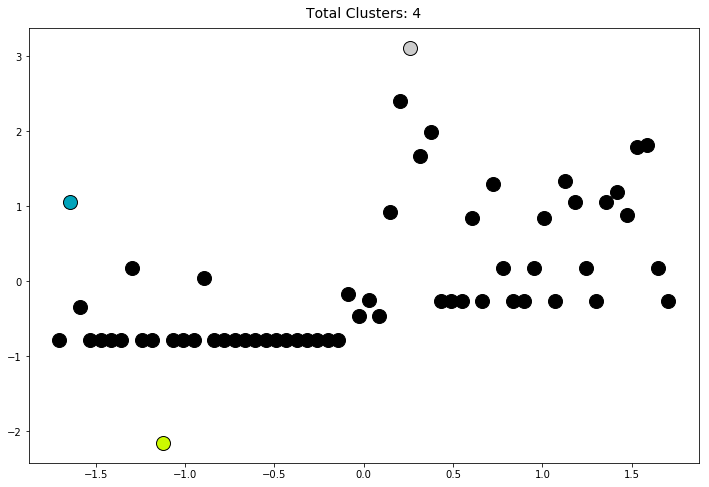

In [260]:
test_clusters(px, .7, 10, 35)

In [252]:
pf = pd.concat([ff,pd.DataFrame(db.labels_,columns=['cluster'])], axis = 1)

In [253]:
pf

,index,fares,cluster
0,0,67.000000,0
1,1,109.687594,1
2,2,77.032893,0
3,3,67.000000,0
4,4,67.000000,0
5,5,67.000000,0
6,6,67.000000,0
7,7,89.138780,0
8,8,67.000000,0
9,9,67.000000,0


In [254]:
rf = pf.groupby('cluster')['fares'].agg(['min','count'])
rf

,min,count
cluster,,
0,67.000000,58
1,109.687594,1
2,157.587864,1


In [255]:
rf.describe([.10, .25, .5, .75, .9])

,min,count
count,3.000000,3.000000
mean,111.425153,20.000000
std,45.318921,32.908965
min,67.000000,1.000000
10%,75.537519,1.000000
25%,88.343797,1.000000
50%,109.687594,1.000000
75%,133.637729,29.500000
90%,148.007810,46.600000
max,157.587864,58.000000
